# CS4305TU: Week 6 - Artificial Neural Network - Assignment
## Investigating neighbourhood choice behaviour using ANNs
**7 & 11 October 2021**

- Sander van Cranenburgh
- Francisco Garrido-Valenzuela 

### General information

* For this assignment we will use *Stated Choice data* on residential location choice, collected in:
    - Mainz, Germany
    - Hanover, Germany
    - Bern, Switzerland
    - Zurich, Switzerland 

- For more details on the data, see the description provided on [Brightspace](https://brightspace.tudelft.nl/d2l/le/content/399675/viewContent/2506146/View). 

- In total you can earn **6.0** points in this assignment. 

- Add **Code cells** to complement your analyses. You can draw a lot form the snippets of codes we used for the in-class exercises.

### Submission instructions

- Answer the questions (code and/or text) in this notebook
- Rename this file by adding your group nomber (e.g. Assignment_groupXX.ipynb)
- Submit your answers both in ipynb and html format

**Provide your answers in the allocated markdown boxes** (with the red font color)


### Set up your environment

You need to set up your environment based on which platform you would like to use. In this case we offer two options:

- Google Colaboratory (Colab)
- Jupyter Lab or Notebooks (Local)

#### Using Colab

Students using **Colab**, just need to install **Biogeme**. Biogeme is a Python package designed for the maximum likelihood estimation of parametric models in general, with a special emphasis on discrete choice models. Just run the following notebook cell:

In [2]:
# Uncomment and run this cell if you are using Google Colab (keep the exclamation mark)
!pip install biogeme
!git clone https://github.com/cs4305tu/assignment
root = 'assignment/'

     |████████████████████████████████| 1.5 MB 31.0 MB/s 
     |████████████████████████████████| 235 kB 63.1 MB/s 
  Created wheel for biogeme: filename=biogeme-3.2.8-cp37-cp37m-linux_x86_64.whl size=4030745 sha256=ba6f38b7b87628d459f4fd7f70776ba8a22f5e6a82439f6fa80811cd01b7aa53
  Stored in directory: /root/.cache/pip/wheels/d4/52/61/de6c73d2bc17603c60e754e260bccb7d4da2503e97015ebd49
Successfully built biogeme
Cloning into 'assignment'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (68/68), done.
remote: Total 73 (delta 21), reused 11 (delta 1), pack-reused 0
Unpacking objects: 100% (73/73), done.


#### Using local environment

Students using their *local environments*, need to install all the dependencies used in this *Week 6*, to ensure compatibility, they also need to check the versions of each dependency. All dependencies are contained in the text file: **requirements.txt**. Just run the following notebook cell:

In [3]:
# Uncomment and run this cell if you are using your local environment (keep the exclamation mark)
#!pip3 install -r requirements.txt
#root = ''

### Required Python packages

In the following cell add all the packages you need to finish this assignment.

In [4]:
import pandas as pd
import numpy as np

### Opening the database

In [5]:
# Load the data into a dataframe
df = pd.read_csv(f'{root}datasets/neighbourhood_choice2018.dat', sep='\t')
df.head()

,ID,ID2,STORES1,TRANSPORT1,CITY1,NOISE1,GREEN1,FOREIGN1,STORES2,TRANSPORT2,CITY2,NOISE2,GREEN2,FOREIGN2,STORES3,TRANSPORT3,CITY3,NOISE3,GREEN3,FOREIGN3,CHOICE,SSTADT,RESPCITY,WOMAN,AGE,ENVCONC,COMPLETE
0,2,5,10,5,1,2,2,0.4,15,10,2,3,3,0.1,2,15,4,4,4,0.2,1,3,3,0,42,3.0,1
1,2,6,15,5,4,4,1,0.1,2,10,5,1,2,0.2,5,15,1,2,3,0.3,2,3,3,0,42,3.0,1
2,2,7,10,15,1,3,1,0.4,15,2,2,4,2,0.1,2,5,4,1,3,0.2,3,3,3,0,42,3.0,1
3,2,8,15,15,5,4,4,0.4,2,2,1,1,1,0.1,5,5,2,2,2,0.2,2,3,3,0,42,3.0,1
4,3,9,15,5,5,1,3,0.4,2,10,1,2,4,0.1,5,15,2,3,1,0.2,2,2,2,1,41,4.5,1


## Questions

### Q1. Do a proper descriptive analysis of the data set (1.0 pt)

It is good practice do a descriptive analysis of the data you want to model, prior to the real modelling. So inspect e.g. what levels the attributes (features) take, correlations, class (im)balances, redudant variables, missing values, etc. to attain a good feeling for the data.

In [6]:
print('The amount of choice experiments in the dataset is', len(df))

#Figuring out which city is which
citylist1 = df.index[df['RESPCITY'] == 1].tolist()
citylist2 = df.index[df['RESPCITY'] == 2].tolist()
citylist3 = df.index[df['RESPCITY'] == 3].tolist()
citylist4 = df.index[df['RESPCITY'] == 4].tolist()
print('Respondents in city 1:',int(len(citylist1)/4))
print('Respondents in city 2:',int(len(citylist2)/4))
print('Respondents in city 3:',int(len(citylist3)/4))
print('Respondents in city 4:',int(len(citylist4)/4))

#Correlations between columns
print(df.corr(method ='pearson'))

#Class imbalance investigation
choice1list = df.index[df['CHOICE'] == 1].tolist()
choice2list = df.index[df['CHOICE'] == 2].tolist()
choice3list = df.index[df['CHOICE'] == 3].tolist()
print('Amount of times option 1 was chosen:', len(choice1list))
print('Amount of times option 2 was chosen:', len(choice2list))
print('Amount of times option 3 was chosen:', len(choice3list))

#Redundant values
Redundantlist = df.index[df['SSTADT'] != df['RESPCITY']].tolist()
print('The amount of times the Responder city was not choosing in the city of interest was:', len(Redundantlist))

#Where was the survey not completed?
completelist = df.index[df['COMPLETE'] == 0].tolist()
print('The indices of choices where the survey was not completed are:',completelist)


The amount of choice experiments in the dataset is 9720
Respondents in city 1: 573
Respondents in city 2: 431
Respondents in city 3: 790
Respondents in city 4: 636
                  ID       ID2   STORES1  ...       AGE   ENVCONC  COMPLETE
ID          1.000000  1.000000 -0.001783  ...  0.008534 -0.015715  0.011881
ID2         1.000000  1.000000 -0.001794  ...  0.008534 -0.015715  0.011881
STORES1    -0.001783 -0.001794  1.000000  ...  0.013050 -0.015544  0.004566
TRANSPORT1 -0.003597 -0.003600 -0.003910  ...  0.001065  0.008481 -0.005631
CITY1       0.006020  0.006038  0.003013  ... -0.003575 -0.004401  0.005286
NOISE1      0.009978  0.009993 -0.009428  ...  0.020722 -0.004773 -0.010012
GREEN1     -0.004412 -0.004418  0.001027  ... -0.004805  0.009038 -0.004898
FOREIGN1    0.006491  0.006487 -0.000476  ...  0.005237 -0.021700  0.013481
STORES2    -0.003277 -0.003268 -0.161996  ...  0.004758  0.013104 -0.014279
TRANSPORT2 -0.012468 -0.012480  0.008735  ... -0.005703  0.015106 -0.012433


<font color='red'>

**ANSWER Q1** <br>
The attribute Stores takes levels: 2, 5, 10 and 15. This is the time to walk to a grocery store in minutes.

The attribute Transport takes levels: 2, 5, 10 and 15. This is the time to walk to public transportation in minutes.

The attribute City takes levels: 1, 2, 4 and 5. Meaning 1: below 1km, 2: 1 to 2 km, 4: 3 to 4 km or 5: over 4km distance to the city center

The attribute Noise takes levels: 1, 2, 3 and 4. Meaning street traffic noise is 1: None, 2: little, 3: medium, 4: high.

The attribute Noise takes levels: 1, 2, 3 and 4. Meaning there are various amounts of green areas in the residential area with 1: None, 2: (very) few, 3: some, 4: many.

The attribute Foreigner takes levels: 0.1, 0.2, 0.3 and 0.4, meaning that there are 10%, 20%, 30% or 40% foreigners of total inhabitants living in the residential area

The attribute Choice can take tevels 1, 2, 3 indicating which option was chosen.

The attribute SSTADT can take values 1, 2, 3, 4 indicating which city the options were in.

The attribute RESPCITY can take values 1, 2, 3, 4 indicating in which city the respondent is currently living. Since in the word document the total respondents was recorded, we can deduce from the occurences in RESPCITY that value 1 is Mainz, value 2 is Hannover, value 3 is Bern and value 4 is Zurich.

The attributes WOMAN and AGE speak for themselves and can take values 0 or 1, or 18 to 70 (with 99999 as "missing value")

And lastly ENVCONC is the environmental concern, which can take on values 1 through 5.

---------------------------------------------------------------------------
---------------------------------------------------------------------------
---------------------------------------------------------------------------
Some correlations can be seen in the code output above. I

The classes are slightly inbalanced because option 1 was chosen 3440 times, option 2 was chosen 3266 times and option 3 was chosen 3014 times. This is important to keep in mind since the model might learn that option 1 is slightly more desireable, even though it is supposed to be random so that is not what we want the model to learn.

Since we can see that RESPCITY is always equal to SSTADT, we can say one of the columns is redundant and can be thrown away.

### Q2. Estimate a RUM-MNL discrete choice model (1.0 pt)

Assume utility is linear additive-utility: 

$ V_{in} = \sum_{m}\beta_m x_{imn}$

And estimate marginal utilities (i.e. betas) for: 

1. Distance to Transport [min] (**Note** that distances are given in minutes)
2. Distance to City [km]
3. Distance to Stores [min] (**Note** that distances are given in minutes)
4. Traffic Noise
5. Green area
6. Share of foreigners [%]

**Note:** Do not add any other variables (features) to the model.

**To get the scores, address the following:**

- (A) Report the parameter estimates, and interpret them. i.e. do they have the expected sign? (0.5 pts)
- (B) Compute and report the cross-entropy (0.5 pts)

In [7]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import biogeme.biogeme as bio
import biogeme.database as db
import biogeme.optimization as opt
import biogeme.messaging as msg
from biogeme import models
from biogeme.expressions import Beta
from sklearn.metrics import log_loss

database = db.Database('city_choicedata', df)
globals().update(database.variables)
B_transport = Beta('B_transport', 0, None, None, 0)
B_city = Beta('B_city', 0, None, None, 0)
B_store = Beta('B_store', 0, None, None, 0)
B_noise = Beta('B_noise', 0, None, None, 0)
B_green = Beta('B_green', 0, None, None, 0)
B_foreign = Beta('B_foreign', 0, None, None, 0)
# Utility functions
V1 = B_transport * TRANSPORT1 + B_city * CITY1 + B_store * STORES1 + B_noise * NOISE1 + B_green * GREEN1 + B_foreign * FOREIGN1
V2 = B_transport * TRANSPORT2 + B_city * CITY2 + B_store * STORES2 + B_noise * NOISE2 + B_green * GREEN2 + B_foreign * FOREIGN2
V3 = B_transport * TRANSPORT3 + B_city * CITY3 + B_store * STORES3 + B_noise * NOISE3 + B_green * GREEN3 + B_foreign * FOREIGN3

# Associate utility functions with the numbering of alternatives in df.CHOICE
V = {1: V1, 2: V2, 3: V3}
av = {1: COMPLETE, 2: COMPLETE, 3: COMPLETE}

# Definition of the model. This is the contribution of each observation to the log likelihood function.
prob = models.loglogit(V, av, CHOICE)

# Create the Biogeme object
biogeme = bio.BIOGEME(database, prob)
biogeme.modelName = 'Discrete choice model of living situation'
biogeme.generatePickle = False
biogeme.generateHtml = False

# Calculate the null log likelihood for reporting.
biogeme.calculateNullLoglikelihood(av)

# Estimate the parameters
results = biogeme.estimate()

# Report the results in a pandas table
print('Estimated parameters')
print('----------')
pandasResults = results.getEstimatedParameters()
print(pandasResults[['Value','Std err','t-test','p-value']])

# Get the estimated betas from the discrete choice model
betas = results.getBetaValues()

# Define compute objects
prob_1 = models.logit(V, av, 1)
prob_2 = models.logit(V, av, 2)
prob_3 = models.logit(V, av, 3)

# Define dictionary
simulate_dict = {
    'Prob_1': prob_1,
    'Prob_2': prob_2,
    'Prob_3': prob_3}

# Create Biogeme object
simulator = bio.BIOGEME(database, simulate_dict)

# Compute probabilities using the estimated choice model
probs_DCM = simulator.simulate(betas)

# Compute the cross-entropy for the DCM
cross_entropy_DCM = log_loss(df.CHOICE,probs_DCM)

print()
print('The cross-entropy of the DCM is:',"{:.3f}".format(cross_entropy_DCM))

/usr/local/lib/python3.7/dist-packages/biogeme/expressions.py:1639: RuntimeWarning: divide by zero encountered in log
  return np.log(self.child.getValue())


Estimated parameters
----------
             Value   Std err  t-test  p-value
B_city         0.0  0.006888     0.0      1.0
B_foreign      0.0  0.097581     0.0      1.0
B_green        0.0  0.009740     0.0      1.0
B_noise        0.0  0.009750     0.0      1.0
B_store        0.0  0.002204     0.0      1.0
B_transport    0.0  0.002204     0.0      1.0

The cross-entropy of the DCM is: 1.099


<font color='red'>

**ANSWER Q2** <br>
The estimated parameters are:

B_city $\approx$ -0.167

B_foreign $\approx$ -1.195

B_green $\approx$ 0.416

B_noise $\approx$ -0.437

B_store $\approx$ -0.034

B_transport $\approx$ -0.074

These parameters make sense since people prefer to not live far from the city, grocery store and public transportation, with a lot of foreigners and with a lot of noise. So therefore the betas have a negative sign.
But they do prefer to live in an area with a lot of green, which has a positive beta in our results.

The cross-entropy was computed to be 0.894

### Q3. Based on your results, compute the WtP of the average decision maker to reduce the share of foreigners in a neighbourhood by 1 percentage point in terms of the distance to the grocery stores (0.5 pts)

Thus, the answer must be of the following form: .... [minutes/percentage point].


In [8]:
B_foreign =-1.195
B_store =-0.034
Wtp=B_store/B_foreign
print('Willingness to Pay estimate         = ', "{:.2f}".format(Wtp),' minutes per less percentage of foreigners')


Willingness to Pay estimate         =  0.03  minutes per less percentage of foreigners


<font color='red'>

**ANSWER Q3** <br>
...Willingness to Pay estimate         =  0.03  minutes per less percentage of foreigners


### Q4. Train a hybrid RUM-MNL-ANN model (1.5 pts)

Since we are interested in the WtP of Q3, make sure when building the hybrid model to place the features of the share of foreigners and of the distance to the grocery stores in the *MNL part of the model*. For the *ANN part of the model* use 2 hidden layers, with 5 nodes each. 


**To get the scores, address the following:**


- (A) Build the model, plot the loss as a function of the epochs & report the cross entropy of your final model based on the test data. (1.0 pt)
- (B) Compare the model performance to that of the discrete choice model. Interpret the result. (0.5 pts)

In [21]:
import tensorflow as tf
print("Using tensorflow ",tf.__version__)
import pandas as pd
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from keras import backend as K
from keras.layers import Input, Dense, Activation
from keras.layers import Conv2D, Add, Reshape
from keras.models import Model
from keras.utils.np_utils import to_categorical   
import matplotlib.pyplot as plt
import numpy as np

# Import ML packaged and modules
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, log_loss
NALT = 3  
no_X_MNL = 2 
no_X_ANN = 18
num_nodes = 5 
nEpoch = 500  
# INPUT FOR MNL PART
X_MNL = Input((no_X_MNL, NALT,1), name = 'Features2MNL')

# COMPUTE UTILITY FOR MNL
V_MNL = Conv2D(filters = 1, kernel_size = [no_X_MNL,1], strides = (1,1), padding = 'valid', name = 'MNL_layer', use_bias = False, trainable = True)(X_MNL)
# INPUT FOR ANN PART
X_ANN = Input((no_X_ANN), name ='Features2ANN')

# CREATE HIDDEN LAYER(S) OF ANN
layer1_ANN = Dense(units = num_nodes, name = "ANN_layer1", use_bias = True)(X_ANN) 
layer2_ANN = Dense(units = num_nodes, name = "ANN_layer2", use_bias = True)(layer1_ANN)

# COMPUTE UTILITY FOR ANN 
V_ANN = Dense(units = NALT, name = "V_ANN")(layer2_ANN) 

# RESHAPE TENSORS TO [1 X NALT]
V_MNL = Reshape([NALT], name = 'Flatten_Dim_MNL')(V_MNL)
V_ANN = Reshape([NALT], name = 'Flatten_Dim_ANN')(V_ANN) 

# SUM THE UTILITIES OF BOTH MODEL PARTS
V_MNL_ANN = Add(name = "Combining_Vs")([V_MNL,V_ANN])

# CREATE LOGIT (AKA SOFTMAX ) OUTPUT LAYER
logits = Activation('softmax', name = 'Probability')(V_MNL_ANN)

# BUILD THE MODEL
model = Model(inputs = [X_MNL, X_ANN], outputs = logits)

# Define the features and the output class
X = df[['STORES1','TRANSPORT1','CITY1','NOISE1','GREEN1','FOREIGN1','STORES2','TRANSPORT2','CITY2','NOISE2','GREEN2','FOREIGN2','STORES3','TRANSPORT3','CITY3','NOISE3','GREEN3','FOREIGN3','SSTADT',	'RESPCITY',	'WOMAN',	'AGE']]
					
# Define the output target
Y = df['CHOICE']
Y_cat = to_categorical(Y-1, num_classes = 3)
# Create x input for MNL layer, and rescale
scale = 100 # We cannot just use the sklearn scaler here, as it is import for the interpretation later how the input data are scaled. 

x_mnl = np.array([[np.divide(X['STORES1'], scale), np.divide(X['FOREIGN1'], scale)],
                  [np.divide(X['STORES2'], scale), np.divide(X['FOREIGN2'], scale)],
                  [np.divide(X['STORES3'], scale), np.divide(X['FOREIGN3'], scale)]])
x_mnl = np.swapaxes(x_mnl, 0, 2)
x_mnl = np.expand_dims(x_mnl, 3)
print('Shape of x_mnl', x_mnl.shape)

# Create x input for ANN layer
x_ann = np.array([[ X['CITY1'],X['TRANSPORT1'], X['NOISE1'], X['GREEN1'],X['TRANSPORT2'], X['CITY2'],X['TRANSPORT2'], X['NOISE2'], X['GREEN2'], X['TRANSPORT3'], X['CITY3'],X['TRANSPORT3'], X['NOISE3'], X['GREEN3'], X['SSTADT'], X['WOMAN'],X['RESPCITY'], X['AGE']]])
x_ann = np.squeeze(np.swapaxes(x_ann, 0, 2))

# Rescale input for the ANN part
scaler = StandardScaler()  
scaler.fit(x_ann)  
x_ann = scaler.transform(x_ann)  
print('Shape of x_ann',x_ann.shape)

# Split the data into a training and test part
X_mnl_train, X_mnl_test, Y_train, Y_test = train_test_split(x_mnl, Y_cat, random_state = 1, test_size = 0.35)
X_ann_train, X_ann_test, Y_train, Y_test = train_test_split(x_ann, Y_cat, random_state = 1, test_size = 0.35)
print('Total number of obervations in the data set = ', len(x_mnl))
print('Number of obervations in the training set   = ', len(X_mnl_train))
print('Number of obervations in the test set       = ', len(X_mnl_test))

model.compile(optimizer = Adam(learning_rate = 1e-2), metrics = ["accuracy"], loss = 'categorical_crossentropy')
model.summary()

# Train the model
early_stopping = EarlyStopping(patience = 4, monitor = 'val_loss')
history = model.fit([X_mnl_train, X_ann_train],Y_train, batch_size=len(X_mnl_train), epochs = nEpoch, verbose = 1, validation_data = ([X_mnl_test, X_ann_test], Y_test), callbacks = [early_stopping])

betas_layer = model.get_layer(name = 'MNL_layer')
betas = betas_layer.get_weights()
print('The cross-entropy on the test data of the tensor flow ANN is',"{:.3f}".format(history.history['loss'][-1]))


Using tensorflow  2.6.0
Shape of x_mnl (9720, 2, 3, 1)
Shape of x_ann (9720, 18)
Total number of obervations in the data set =  9720
Number of obervations in the training set   =  6318
Number of obervations in the test set       =  3402
Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Features2ANN (InputLayer)       [(None, 18)]         0                                            
__________________________________________________________________________________________________
ANN_layer1 (Dense)              (None, 5)            95          Features2ANN[0][0]               
__________________________________________________________________________________________________
Features2MNL (InputLayer)       [(None, 2, 3, 1)]    0                                            
_____________________________________________________

Text(0, 0.5, 'Loss')

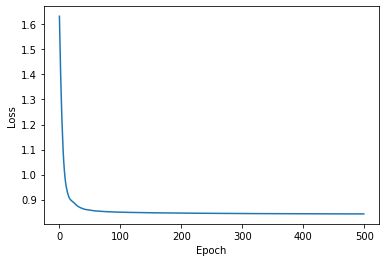

In [20]:
plt.plot((history.history['loss']))
plt.xlabel("Epoch")
plt.ylabel("Loss")

<font color='red'>

**ANSWER Q4** <br>
The cross-entropy on the test data is 0.843. The Epoch vs Loss has been plotted in the above graph. This model predicts better as the cross entropy is lesser than discreet choice model, which means better accuracy

### Q5. Compute the WtP of the average decision maker to reduce the share of foreigners in a neighbourhood by 1 percentage point using the results from the hybrid model. Compare the outcome with the results of your discrete choice model (0.5 pts)

<font color='red'>

**ANSWER Q5** <br>
...

### Q6. Explore whether, or not, the preferences of the inhabitants of the four cities regarding the trade-off between share of foreigners and distance to grocery stores are equal across the four cities. (1.5 pts)

Perform a series of (clever) analyses, and interpret the findings. In other words, can we conclude that the inhabintants of all cities are equally xenophobic? For these analysis, use hybrid models, and/or DCMs.

**Hint:** create new features capturing for the share of foreigners *per city*. 

<font color='red'>

**ANSWER Q6** <br>
...